
# Project: Investigate a Dataset - TMDB Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I chose TMDB Data set for the project. In the analysis I tried to get insights about the popularity and profitability of movies. With that said the analysis focuses on how genres of movies influence popularity and how bugdet is related to profitability of movies.
### Questions
1. Which genres are most popular and least popular among viewers?
2. How does the budget of a movie affect its profit?


In [3]:
# importing packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

> In this section we will check the data quality and do the necassarty cleanup.

### General Properties

In [4]:
#  In this part we will load the data and check types and look for instances of missing or possibly errant data.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




### Data Cleaning

## Checking the contents of the data
Here we will get basic information about the data 

In [5]:
# get information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Check the baisc stats about the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Removing Duplicated values

In [7]:
# Checking the number of duplicates
sum(df.duplicated())

1

In [8]:
#droping the duplicated data 
df.drop_duplicates(inplace=True)

In [9]:
# Check the duplicated is removed by counting the sum of duplicates again
sum(df.duplicated())

0

## Managing Missing Values

Before handling the missing values we will drop columns that won't be used for the analysis

In [10]:
#Droping unused columns
df.drop(['id','cast','homepage','director','tagline','overview','runtime','keywords','production_companies','release_date','vote_count','budget_adj','revenue_adj'],axis=1,inplace=True)

In [11]:
#making sure all the columns mentioned in the above step are removed
df.head()

,imdb_id,popularity,budget,revenue,original_title,genres,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,tt2908446,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,6.3,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,7.3,2015


## Removing null values from the dataframe
since genres has some missing data it will be better to remove the rows that don't have data

In [12]:
# removing null values
df.dropna(inplace=True)

In [13]:
#Making sure all the nulls are removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdb_id         10834 non-null  object 
 1   popularity      10834 non-null  float64
 2   budget          10834 non-null  int64  
 3   revenue         10834 non-null  int64  
 4   original_title  10834 non-null  object 
 5   genres          10834 non-null  object 
 6   vote_average    10834 non-null  float64
 7   release_year    10834 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 761.8+ KB


## Correcting the data on 'Genres' Column
The column has more than one entry per movie, and each gener is separated by | 
we need to use split and explode functions and make sure each movie has only one entry

### First we will use the split function to get rid of the | symbol

In [14]:
df['genres']=df['genres'].str.split("|")

In [15]:
# Lets make sure the symbol is no longer there
df.head()

,imdb_id,popularity,budget,revenue,original_title,genres,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"[Action, Adventure, Science Fiction, Thriller]",7.1,2015
2,tt2908446,13.112507,110000000,295238201,Insurgent,"[Adventure, Science Fiction, Thriller]",6.3,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Action, Adventure, Science Fiction, Fantasy]",7.5,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,"[Action, Crime, Thriller]",7.3,2015


### Now we can use the Explode function to create one row per genre and assign it to a new object called genres

In [16]:
genres=df.explode('genres')
#Lets see if the function worked in creating a row per genre
genres.head()

,imdb_id,popularity,budget,revenue,original_title,genres,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Action,6.5,2015
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Adventure,6.5,2015
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Science Fiction,6.5,2015
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Thriller,6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Action,7.1,2015


<a id='eda'></a>
## Exploratory Data Analysis


### Which genres are most popular and least popular among viewers?
In this section we will try to analyse how genre affects popularity of a move. By doing so we will Identify which genres have the most and least pouplar movies.

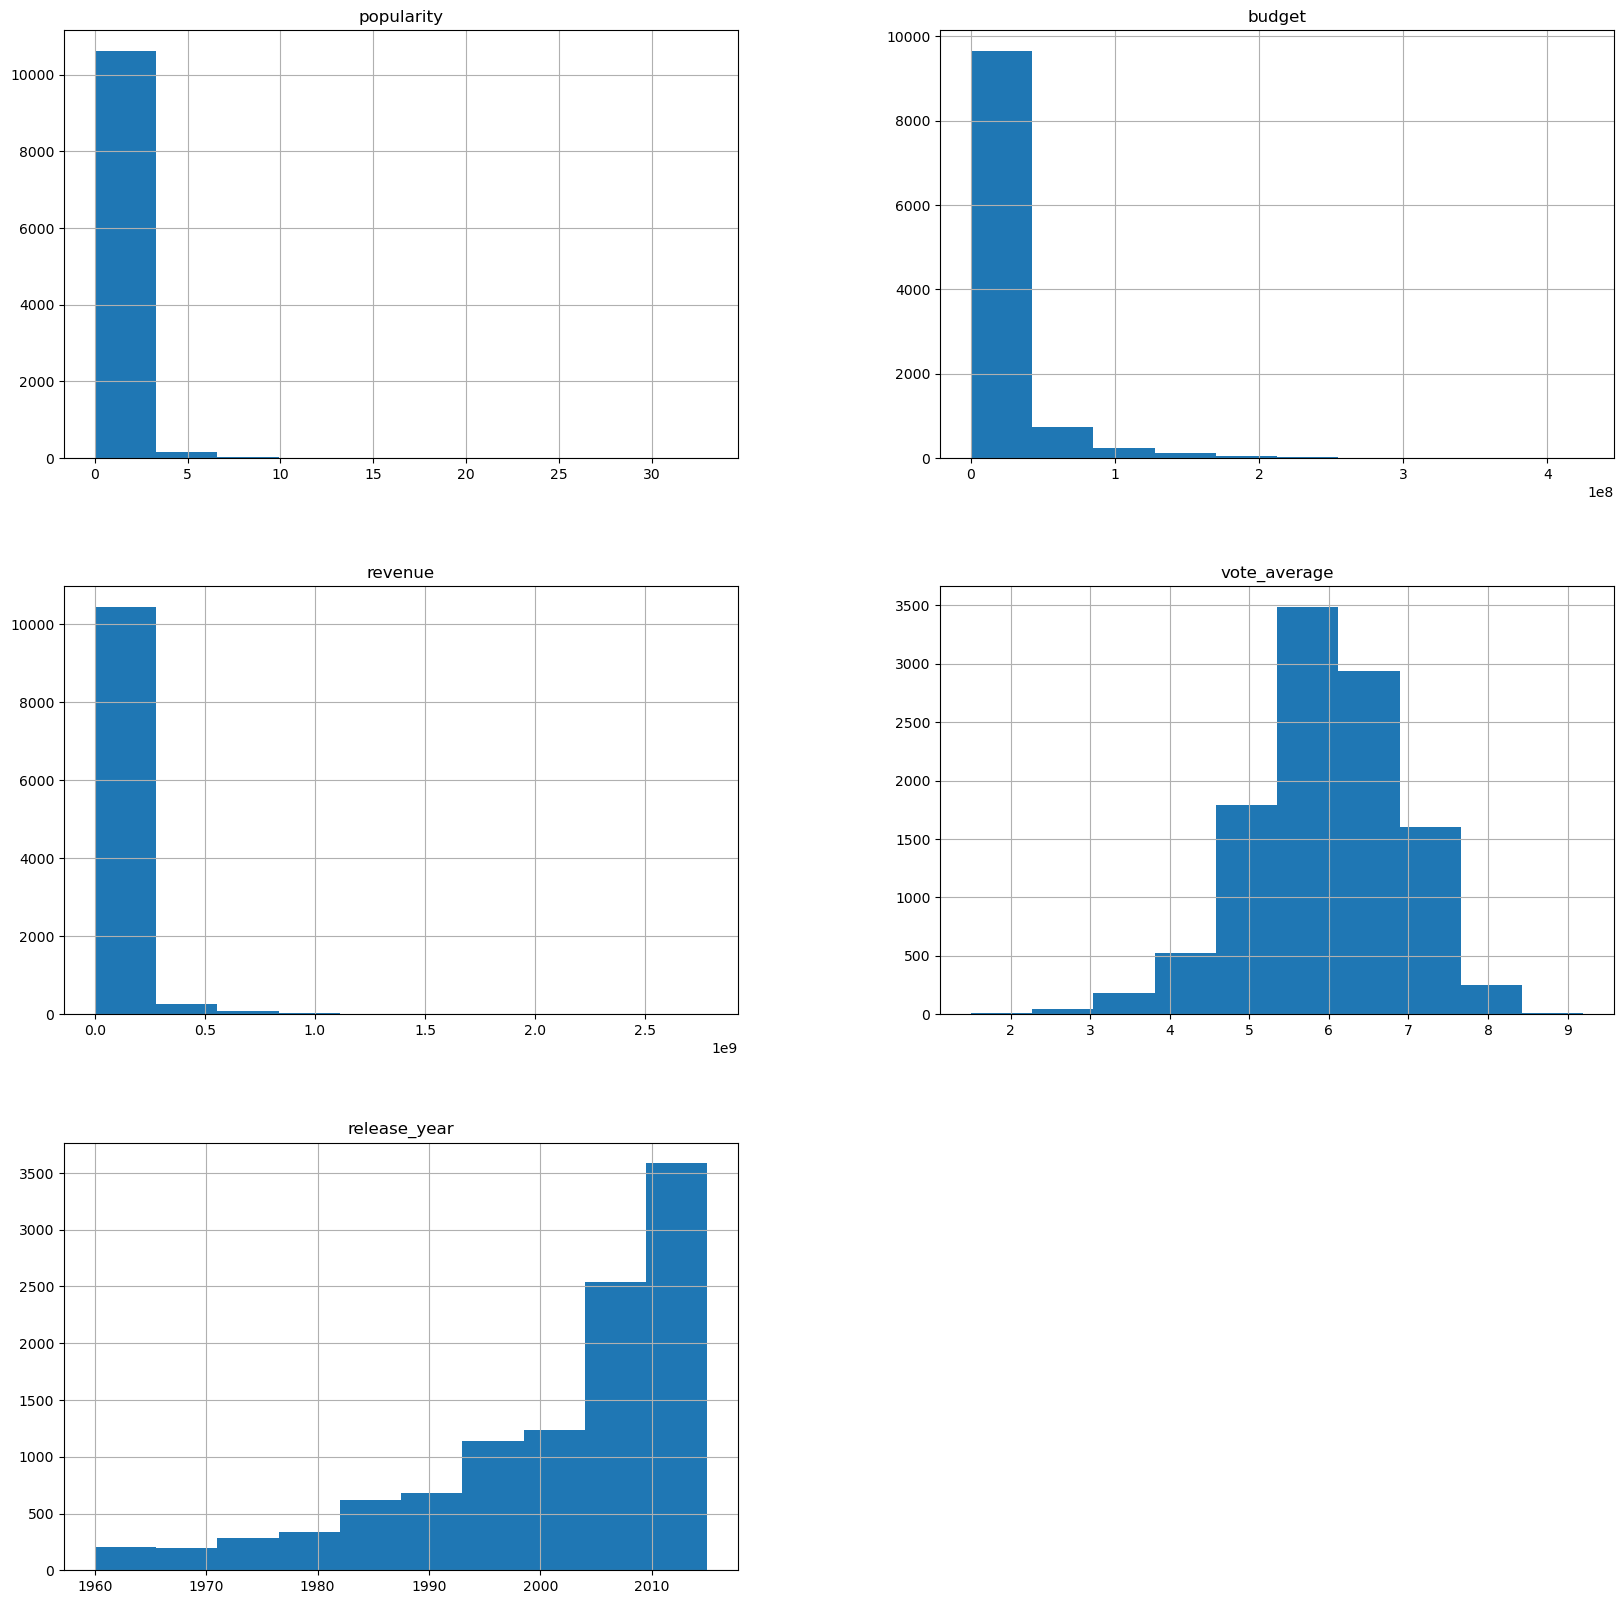

In [35]:
# First lets check the distribution of all the attribues we will be using to do the analysis
df.hist(figsize=(20,20));

From the above distributions we can see Popularity, Budget and revenue are skewed to the right.

In [17]:
#lets check stats on popularity
df['popularity'].describe()

count    10834.000000
mean         0.647776
std          1.001316
min          0.000065
25%          0.208387
50%          0.384587
75%          0.715768
max         32.985763
Name: popularity, dtype: float64

In [40]:
#lets use 1D Exploration to see how popularity score are given
#Since we might use the Box plot for other attributes also we can create a function for it.
def Box_plotter(lable):
    df.boxplot(lable)

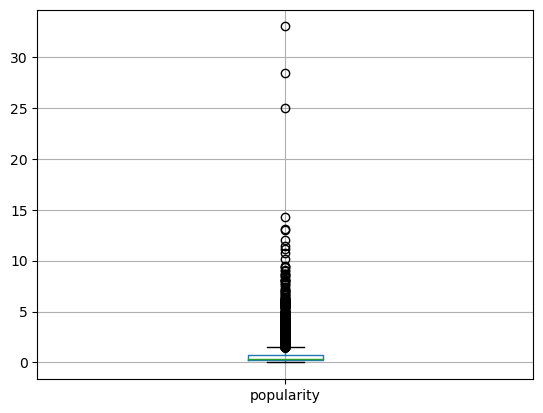

In [41]:
Box_plotter('popularity')

From the above box we can see most of the movies has popularity score that are around 10 while there are few outliners that go above 20.

In [18]:
# Since we have done the data clean up on genres in the previous part, we can use the column with out no problems
# we can see the value counnts of the column
genres['genres'].value_counts()

Drama              4758
Comedy             3792
Thriller           2907
Action             2379
Romance            1712
Horror             1637
Adventure          1469
Crime              1354
Family             1230
Science Fiction    1224
Fantasy             913
Mystery             810
Animation           697
Documentary         519
Music               407
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

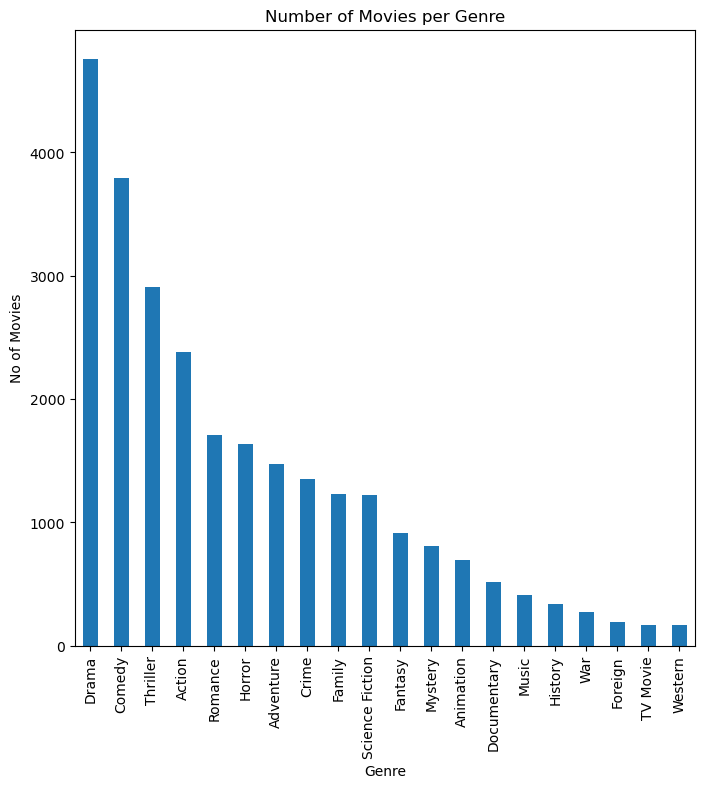

In [19]:
# Now we have the counts we can start creat a plot for the data to better visualaize the data
plt.figure(figsize=[8,8])
genres['genres'].value_counts().plot.bar()
plt.title("Number of Movies per Genre")
plt.ylabel("No of Movies")
plt.xlabel("Genre");

### From the above graph we can see Drama, Comedy and Thriller are the most made movies out of all the genres

#### Now lets figure out what genres are popular by using group by on genres and popularity

In [20]:
genres_mean=genres.groupby('genres')[['popularity']].mean().sort_values('popularity', ascending=False)
genres_mean

,popularity
genres,
Adventure,1.155401
Science Fiction,1.004791
Fantasy,0.995129
Action,0.927591
Animation,0.853386
Family,0.786844
Crime,0.744930
Thriller,0.741563
War,0.727683


<Figure size 800x800 with 0 Axes>

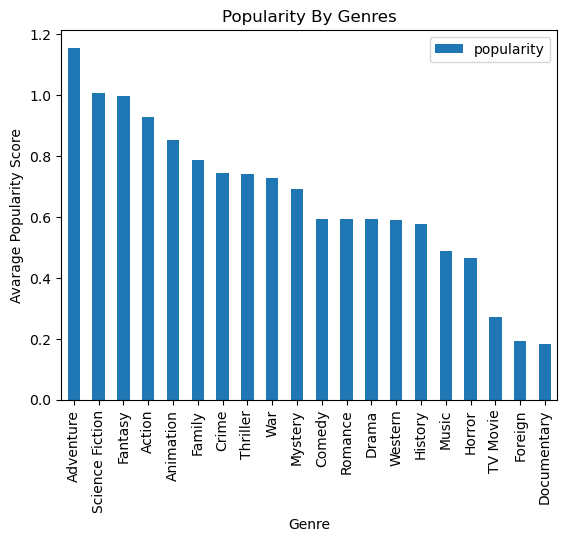

In [21]:
# Let's create a visualization for the data in this section
plt.figure(figsize=[8,8])
genres_mean.plot.bar()
plt.title("Popularity By Genres")
plt.ylabel("Avarage Popularity Score")
plt.xlabel("Genre");

### Based on the above results we can see Adventure, Science Fiction and Fantasy are the most popular genres while TV movie, Foreign and Documentary are the least poupular

### How does the budget of a movie affect its profit?
In this section we will try to identify how the bugdet of a movie is related to its profitability.

In [39]:
# First lets see the stats for budget
df['budget'].describe()

count    1.083400e+04
mean     1.466613e+07
std      3.094857e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

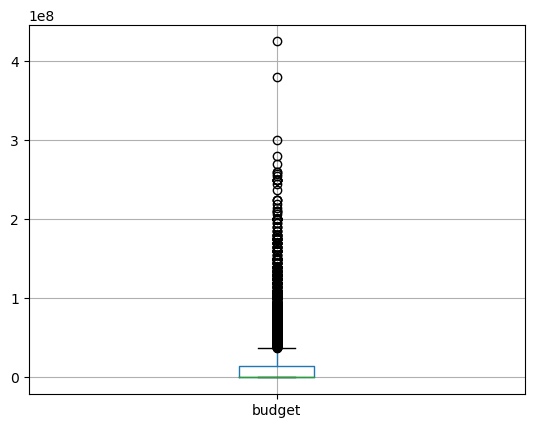

In [45]:
#Lets see how the bugdet data looks like using a box plot
Box_plotter('budget');

We can see there are few outliers but majority of the budget lay below 2.000000e+08 mark

In [47]:
# Lets take a look at how the revenue data looks like
df['revenue'].describe()

count    1.083400e+04
mean     3.994086e+07
std      1.171561e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.417932e+07
max      2.781506e+09
Name: revenue, dtype: float64

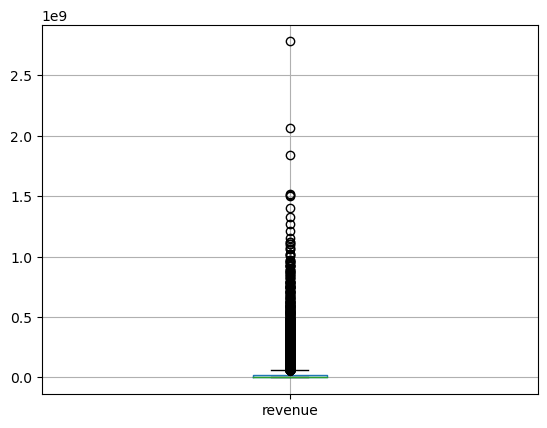

In [46]:
#Lets see how the revenue data looks like using a box plot
Box_plotter('revenue');

In [88]:
# Lets create a formula for net profit, and add it to the data fra
df['Net_profit'] = df['revenue'] - df['budget']

In [89]:
# lets see if the new column is added on the dataframe
df.head()

,imdb_id,popularity,budget,revenue,original_title,genres,vote_average,release_year,Net_profit
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015,1363528810
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"[Action, Adventure, Science Fiction, Thriller]",7.1,2015,228436354
2,tt2908446,13.112507,110000000,295238201,Insurgent,"[Adventure, Science Fiction, Thriller]",6.3,2015,185238201
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Action, Adventure, Science Fiction, Fantasy]",7.5,2015,1868178225
4,tt2820852,9.335014,190000000,1506249360,Furious 7,"[Action, Crime, Thriller]",7.3,2015,1316249360


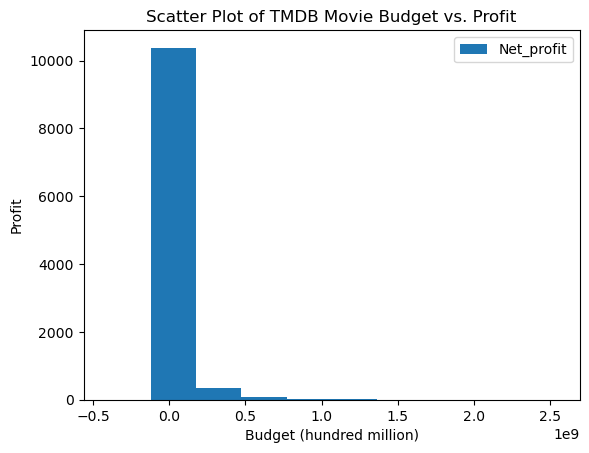

In [90]:
# Now lets create a scatter plot to see the relation of profit and budget
df.plot(y='Net_profit', x='budget', kind='hist')
plt.title("Scatter Plot of TMDB Movie Budget vs. Profit")
plt.xlabel("Budget (hundred million)")
plt.ylabel("Profit");

In [2]:
#lets use scatter graphs to see the distribution of Net profit and Budget
df.plot(y='Net_profit',x='budget',kind='scatter')
plt.title("Scatter Plot of  Movie Budget against Profit")
plt.xlabel("Budget")
plt.ylabel("Net Profit");

NameError: name 'df' is not defined

#### Lets see how the top 10 and bottom 10 bugeted movies did when it comes to profit

In [92]:
Top_10=df.groupby('original_title')[['budget','revenue','Net_profit']].sum().sort_values('budget',ascending=False).iloc[:10,:]
Top_10

,budget,revenue,Net_profit
original_title,,,
The Warrior's Way,425000000,11087569,-413912431
Pirates of the Caribbean: On Stranger Tides,380000000,1021683000,641683000
Pirates of the Caribbean: At World's End,300000000,961000000,661000000
Godzilla,290000000,908090363,618090363
The Avengers,280000000,1568080742,1288080742
Avengers: Age of Ultron,280000000,1405035767,1125035767
Superman Returns,270000000,391081192,121081192
John Carter,260000000,284139100,24139100
Tangled,260000000,591794936,331794936


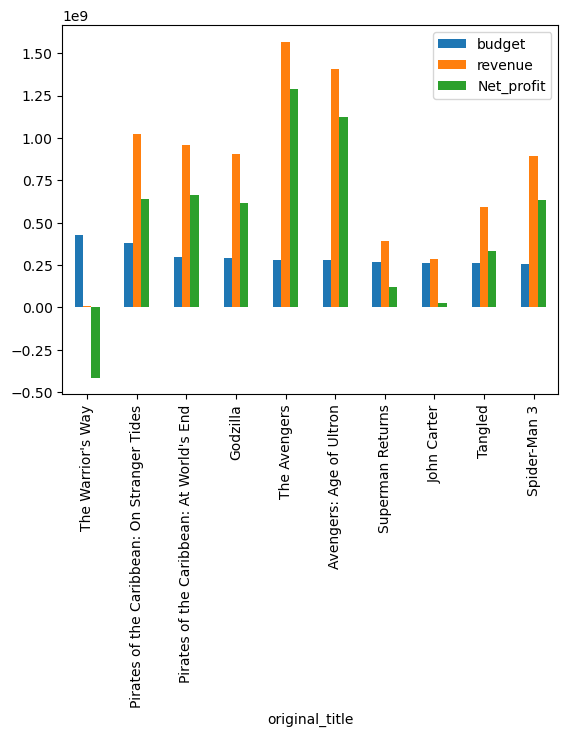

In [97]:
#lets see the high budgeted movies in a bar graph
Top_10.plot(kind='bar');

### Although we can see an exeption from The Warrior's Way movie most of the highly budgeted movies bought High Net profit. 

In [93]:
Bottom10=df.groupby('original_title')[['budget','revenue','Net_profit']].sum().sort_values('budget',ascending=True).iloc[:10,:]
Bottom10

,budget,revenue,Net_profit
original_title,,,
$5 a Day,0,0,0
Nothing Personal,0,0,0
Nothing,0,0,0
Not Without My Daughter,0,0,0
Not Suitable For Children,0,0,0
Not Safe for Work,0,0,0
Not Quite Hollywood,0,0,0
Not Forgotten,0,0,0
Not Cool,0,0,0


#### Since the data shows 0 budgeted movies, lets filter all movies that don't have 0budget

In [50]:
#before removing lets see how many of the records has 0 budget
Zero_budget=df.query('budget == 0')
Zero_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667 entries, 30 to 10864
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdb_id         5667 non-null   object 
 1   popularity      5667 non-null   float64
 2   budget          5667 non-null   int64  
 3   revenue         5667 non-null   int64  
 4   original_title  5667 non-null   object 
 5   genres          5667 non-null   object 
 6   vote_average    5667 non-null   float64
 7   release_year    5667 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 398.5+ KB


In [51]:
# lets filter out the movies that has 0 budget
Budgeted=df.query('budget > 0')
Budgeted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5167 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdb_id         5167 non-null   object 
 1   popularity      5167 non-null   float64
 2   budget          5167 non-null   int64  
 3   revenue         5167 non-null   int64  
 4   original_title  5167 non-null   object 
 5   genres          5167 non-null   object 
 6   vote_average    5167 non-null   float64
 7   release_year    5167 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 363.3+ KB


In [95]:
# Now lets find the bottom 10 from the new dataframe
Bottom10=Budgeted.groupby('original_title')[['budget','revenue','Net_profit']].sum().sort_values('budget',ascending=True).iloc[:10,:]
Bottom10

,budget,revenue,Net_profit
original_title,,,
Fear Clinic,1,0,-1
Lost & Found,1,100,99
"Angus, Thongs and Perfect Snogging",1,0,-1
"Love, Wedding, Marriage",1,1378,1377
Death Wish 2,2,16,14
Death of a Superhero,3,0,-3
Boy,3,43,40
Tales from the Darkside: The Movie,3,16,13
Des Lendemains Qui Chantent,5,0,-5


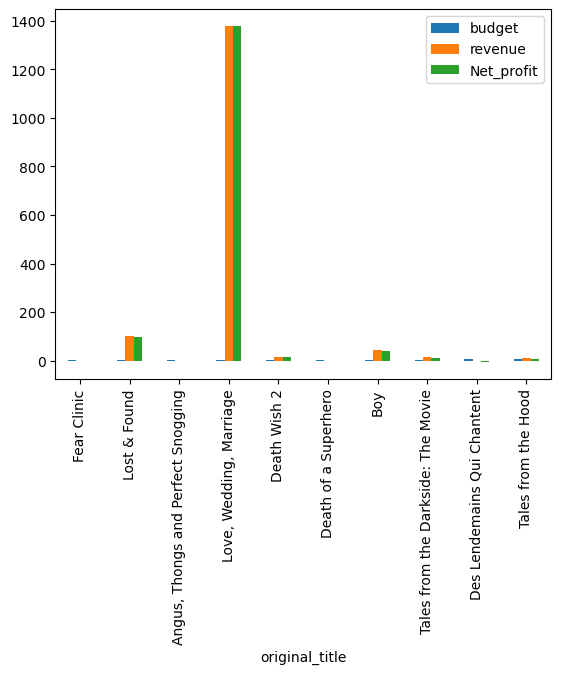

In [99]:
# Lets plot the graph for low budgeted movies
Bottom10.plot(kind='bar');

### From the above data we can see Low bugdeted movies did not bring high profit and 40% of them even had loses

<a id='conclusions'></a>
## Conclusions


### For Question 1 we can conclude that The most popular genres of movies are Adventure, Science Fiction and Fantasy while the Least popular genres are TV movie, Foreign and Documentary 
## Limitations
-  The data contained multiple entries of genre per movies, inorder to make the analysis we needed to split the genre. 
-  The data contained 23 records that didn't have genres sepcified and we needed to remove them.

### For Question 2 we can conclude most highly budgeted movies bring high net profit, and most low bugdeted didn't bring high profit and considerable movies had losess.

## Limitations 
- There were movies that had 0 budget, and it affected the initial analys, and we needed to discard all movies that had zero budget. The totla number of records removed were 5667 and the analysis was done on the remaining 5167 records.
- The budget and revenue did not have any currency associated with them. 
- There were outliers, for instance the movie "The Warrior's Way" had high budget and unlike other movies with high budget it had a huge loss. On the other hand the movie "Love, Wedding, Marriage"had a low budget, but made relativly high profit compared to other movies that had low budget.

### References
https://stackoverflow.com/questions/71369078/init-got-an-unexpected-keyword-argument-max-rows

https://stackoverflow.com/questions/45783594/unable-to-upgrade-tensorflow-to-1-3-0

https://dojo.domo.com/main/discussion/52567/python-tile

https://www.pythonpool.com/python-code-to-convert-a-table-to-first-normal-form/

https://www.google.com/search?q=split+in+pandas+example&rlz=1C1GCEU_enET1013ET1013&oq=split+in+pandas&aqs=chrome.3.69i57j0i512l2j0i22i30l7.9706j0j7&sourceid=chrome&ie=UTF-8

https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf